# Imports

In [1]:
import math
import os
import sys
import pandas as pd
sys.path.append("/home/weber/PycharmProjects/EXOTIC/src")
from statannot import add_stat_annotation

pd.options.mode.chained_assignment = None  # default='warn'
import multiprocessing
import parmap
import numpy as np
import collections
from tqdm import tqdm
import pandarallel
from pandarallel import pandarallel

pandarallel.initialize(nb_workers=20, progress_bar=True)
# tqdm.pandas()
from pprint import pprint
from scipy.stats import zscore
from scipy import stats

import requests
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as mc
from matplotlib.colors import LogNorm
import json
import matplotlib.ticker as mtick
from utils.utils import load_config_file

## YAML FILES CONFIG
yaml = load_config_file(config_file="/home/weber/PycharmProjects/EXOTIC/src/config.yaml")
exotic_files = yaml

import matplotlib.font_manager as font_manager

font_dirs = ['/home/weber/Fonts', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.weight'] = 'light'

INFO: Pandarallel will run on 20 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.


# TMP LiftOver + sQTL

In [1]:
from liftover import ChainFile
converter = ChainFile("/gstock/biolo_datasets/variation/benchmark/Databases/CrossMap/GRCh38_to_GRCh37.chain.gz", "GRCh38", "GRCh37")

def apply_liftover(r, name):
#     print(r)
    try:
        output = converter[r["sQTL_CHROM"]][int(r[name])]
        # print(output)
        converted_pos = output[0][1]
    except KeyError:
        converted_pos = np.nan
    except IndexError:
        converted_pos = np.nan
    return converted_pos

In [39]:
# merge_exotic_sqtl_min = pd.read_parquet('/gstock/EXOTIC/data/QTL/Merge_all_sQTL_EXOTIC_{}.parquet'.format('min'))
# merge_exotic_sqtl_max = pd.read_parquet('/gstock/EXOTIC/data/QTL/Merge_all_sQTL_EXOTIC_{}.parquet'.format('max'))    

# merge_exotic_sqtl_on_tissues_min = pd.read_parquet('/gstock/EXOTIC/data/QTL/Merge_tissues_sQTL_EXOTIC_{}.parquet'.format("min"))   
merge_exotic_sqtl_on_tissues_max = pd.read_parquet('/gstock/EXOTIC/data/QTL/Merge_tissues_sQTL_EXOTIC_{}.parquet'.format("max"))  
exotic_38 = pd.read_parquet('/gstock/EXOTIC/data/EXOTIC/EXOTIC_38.parquet')
merge_exotic_sqtl_on_tissues_max = pd.merge(
    merge_exotic_sqtl_on_tissues_max,
    exotic_38[['MAP', 'Exon_start_38', 'Exon_end_38', 'Exon_start', 'Exon_end']],
    on='MAP'
)
merge_exotic_sqtl_on_tissues_max

,symbol,ensg,MAP,Exon,mean_proportion,EXOTIC_max,EXOTIC_tissues_corrected_max,Gene,Gene_type,Gene stable ID,...,fdr.svQTL,Tissue,gene_id,nb.perm,pv.emp.perm,EXOTIC_bins_max,Exon_start_38,Exon_end_38,Exon_start,Exon_end
0,AACS,ENSG00000081760,AACS_125609448-125609570,125609448-125609570,0.76119,0.915003,Muscle - Skeletal,AACS,Multi Isoform,ENSG00000081760,...,0.773846,Muscle - Skeletal,ENSG00000081760,1000.0,0.001998,0.9 - 0.95,125124902,125125024,125609448,125609570
1,AACS,ENSG00000081760,AACS_125609448-125609570,125609448-125609570,0.76119,0.915003,Muscle - Skeletal,AACS,Multi Isoform,ENSG00000081760,...,0.882626,Muscle - Skeletal,ENSG00000081760,1000.0,0.001998,0.9 - 0.95,125124902,125125024,125609448,125609570
2,AACS,ENSG00000081760,AACS_125609448-125609570,125609448-125609570,0.76119,0.915003,Muscle - Skeletal,AACS,Multi Isoform,ENSG00000081760,...,0.790024,Muscle - Skeletal,ENSG00000081760,1000.0,0.001998,0.9 - 0.95,125124902,125125024,125609448,125609570
3,AACS,ENSG00000081760,AACS_125609448-125609570,125609448-125609570,0.76119,0.915003,Muscle - Skeletal,AACS,Multi Isoform,ENSG00000081760,...,0.791196,Muscle - Skeletal,ENSG00000081760,1000.0,0.001998,0.9 - 0.95,125124902,125125024,125609448,125609570
4,AACS,ENSG00000081760,AACS_125609448-125609570,125609448-125609570,0.76119,0.915003,Muscle - Skeletal,AACS,Multi Isoform,ENSG00000081760,...,0.811676,Muscle - Skeletal,ENSG00000081760,1000.0,0.001998,0.9 - 0.95,125124902,125125024,125609448,125609570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166973,ZSCAN5A,ENSG00000131848,ZSCAN5A_56736032-56736415,56736032-56736415,0.34331,0.964345,Testis,ZSCAN5A,Multi Isoform,ENSG00000131848,...,0.476635,Testis,ENSG00000131848,1000.0,0.000999,0.95 - 1.0,56224663,56225046,56736032,56736415
166974,ZXDC,ENSG00000070476,ZXDC_126157218-126157304,126157218-126157304,0.20989,0.912582,Muscle - Skeletal,ZXDC,Multi Isoform,ENSG00000070476,...,0.687896,Muscle - Skeletal,ENSG00000070476,1000.0,0.000999,0.9 - 0.95,126438375,126438461,126157218,126157304
166975,ZXDC,ENSG00000070476,ZXDC_126158475-126158570,126158475-126158570,0.20989,0.912582,Muscle - Skeletal,ZXDC,Multi Isoform,ENSG00000070476,...,0.687896,Muscle - Skeletal,ENSG00000070476,1000.0,0.000999,0.9 - 0.95,126439632,126439727,126158475,126158570
166976,ZXDC,ENSG00000070476,ZXDC_126160608-126160789,126160608-126160789,0.20989,0.912582,Muscle - Skeletal,ZXDC,Multi Isoform,ENSG00000070476,...,0.687896,Muscle - Skeletal,ENSG00000070476,1000.0,0.000999,0.9 - 0.95,126441765,126441946,126160608,126160789


In [24]:
# merge_exotic_sqtl_min = pd.read_parquet('/gstock/EXOTIC/data/QTL/Merge_all_sQTL_EXOTIC_{}.parquet'.format('min'))
merge_exotic_sqtl_max = pd.read_parquet('/gstock/EXOTIC/data/QTL/Merge_all_sQTL_EXOTIC_{}.parquet'.format('max'))    

# merge_exotic_sqtl_on_tissues_min = pd.read_parquet('/gstock/EXOTIC/data/QTL/Merge_tissues_sQTL_EXOTIC_{}.parquet'.format("min"))   
# merge_exotic_sqtl_max = pd.read_parquet('/gstock/EXOTIC/data/QTL/Merge_tissues_sQTL_EXOTIC_{}.parquet'.format("max"))  
exotic_38 = pd.read_parquet('/gstock/EXOTIC/data/EXOTIC/EXOTIC_38.parquet')
merge_exotic_sqtl_max = pd.merge(
    merge_exotic_sqtl_max,
    exotic_38[['MAP', 'Exon_start_38', 'Exon_end_38', 'Exon_start', 'Exon_end']],
    on='MAP'
)
merge_exotic_sqtl_max

,symbol,ensg,MAP,Exon,mean_proportion,EXOTIC_max,EXOTIC_tissues_corrected_max,Gene,Gene_type,Gene stable ID,...,fdr.svQTL,Tissue,gene_id,nb.perm,pv.emp.perm,EXOTIC_bins_max,Exon_start_38,Exon_end_38,Exon_start,Exon_end
0,A2ML1,ENSG00000166535,A2ML1_8975248-8975309,8975248-8975309,0.69514,0.731334,Adipose - Subcutaneous,A2ML1,Multi Isoform,ENSG00000166535,...,0.741051,Testis,ENSG00000166535,1000.0,0.000999,0.7 - 0.75,8822652,8822713,8975248,8975309
1,A2ML1,ENSG00000166535,A2ML1_8975248-8975309,8975248-8975309,0.69514,0.731334,Adipose - Subcutaneous,A2ML1,Multi Isoform,ENSG00000166535,...,0.757781,Testis,ENSG00000166535,1000.0,0.000999,0.7 - 0.75,8822652,8822713,8975248,8975309
2,A2ML1,ENSG00000166535,A2ML1_8975248-8975309,8975248-8975309,0.69514,0.731334,Adipose - Subcutaneous,A2ML1,Multi Isoform,ENSG00000166535,...,0.802699,Testis,ENSG00000166535,1000.0,0.000999,0.7 - 0.75,8822652,8822713,8975248,8975309
3,A2ML1,ENSG00000166535,A2ML1_8975248-8975309,8975248-8975309,0.69514,0.731334,Adipose - Subcutaneous,A2ML1,Multi Isoform,ENSG00000166535,...,0.904561,Testis,ENSG00000166535,1000.0,0.000999,0.7 - 0.75,8822652,8822713,8975248,8975309
4,A2ML1,ENSG00000166535,A2ML1_8975248-8975309,8975248-8975309,0.69514,0.731334,Adipose - Subcutaneous,A2ML1,Multi Isoform,ENSG00000166535,...,0.821759,Testis,ENSG00000166535,1000.0,0.000999,0.7 - 0.75,8822652,8822713,8975248,8975309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9090631,ZXDC,ENSG00000070476,ZXDC_126180378-126181063,126180378-126181063,0.34803,0.910061,Artery - Tibial,ZXDC,Multi Isoform,ENSG00000070476,...,0.112236,Adrenal Gland,ENSG00000070476,1000.0,0.000999,0.9 - 0.95,126461535,126462220,126180378,126181063
9090632,ZXDC,ENSG00000070476,ZXDC_126180378-126181063,126180378-126181063,0.34803,0.910061,Artery - Tibial,ZXDC,Multi Isoform,ENSG00000070476,...,0.646658,Adrenal Gland,ENSG00000070476,1000.0,0.000999,0.9 - 0.95,126461535,126462220,126180378,126181063
9090633,ZXDC,ENSG00000070476,ZXDC_126180378-126181063,126180378-126181063,0.34803,0.910061,Artery - Tibial,ZXDC,Multi Isoform,ENSG00000070476,...,0.112236,Adrenal Gland,ENSG00000070476,1000.0,0.000999,0.9 - 0.95,126461535,126462220,126180378,126181063
9090634,ZXDC,ENSG00000070476,ZXDC_126180378-126181063,126180378-126181063,0.34803,0.910061,Artery - Tibial,ZXDC,Multi Isoform,ENSG00000070476,...,0.112236,Adrenal Gland,ENSG00000070476,1000.0,0.000999,0.9 - 0.95,126461535,126462220,126180378,126181063


In [52]:
exotic_38 = pd.read_parquet('/gstock/EXOTIC/data/EXOTIC/EXOTIC_38.parquet')
exotic_38

,symbol,ensg,MAP,Exon,mean_proportion,EXOTIC_min,EXOTIC_tissues_min,EXOTIC_pext_associated_min,EXOTIC_check_pext_min,EXOTIC_tissues_corrected_min,...,EXOTIC_tissues_nb_max,Exon_start,Exon_end,EXOTIC_bins_max,EXOTIC_bins_min,CHROM,CHROM_38,Exon_start_38,Exon_end_38,Exon_38
0,A2ML1,ENSG00000166535,A2ML1_8975248-8975309,8975248-8975309,0.69514,0.153430,[Brain - Cerebellar Hemisphere],[0.17518],[ True],[Brain - Cerebellar Hemisphere],...,24,8975248,8975309,0.7 - 0.75,0.15 - 0.2,12,12,8822652,8822713,8822652_8822713
1,A2ML1,ENSG00000166535,A2ML1_8975778-8975961,8975778-8975961,0.69514,0.153430,[Brain - Cerebellar Hemisphere],[0.17518],[ True],[Brain - Cerebellar Hemisphere],...,24,8975778,8975961,0.7 - 0.75,0.15 - 0.2,12,12,8823182,8823365,8823182_8823365
2,A2ML1,ENSG00000166535,A2ML1_8976316-8976478,8976316-8976478,0.69514,0.153430,[Brain - Cerebellar Hemisphere],[0.17518],[ True],[Brain - Cerebellar Hemisphere],...,24,8976316,8976478,0.7 - 0.75,0.15 - 0.2,12,12,8823720,8823882,8823720_8823882
3,A2ML1,ENSG00000166535,A2ML1_8982323-8982375,8982323-8982375,0.69514,0.153430,[Brain - Cerebellar Hemisphere],[0.17518],[ True],[Brain - Cerebellar Hemisphere],...,24,8982323,8982375,0.7 - 0.75,0.15 - 0.2,12,12,8829727,8829779,8829727_8829779
4,A2ML1,ENSG00000166535,A2ML1_8987258-8987278,8987258-8987278,0.69514,0.153430,[Brain - Cerebellar Hemisphere],[0.17518],[ True],[Brain - Cerebellar Hemisphere],...,24,8987258,8987278,0.7 - 0.75,0.15 - 0.2,12,12,8834662,8834682,8834662_8834682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27493,ZXDC,ENSG00000070476,ZXDC_126158475-126158570,126158475-126158570,0.20989,0.150855,[Brain - Nucleus accumbens (basal ganglia)],[0.11398],[ True],[Brain - Nucleus accumbens (basal ganglia)],...,1,126158475,126158570,0.9 - 0.95,0.15 - 0.2,3,3,126439632,126439727,126439632_126439727
27494,ZXDC,ENSG00000070476,ZXDC_126160608-126160789,126160608-126160789,0.20989,0.150855,[Brain - Nucleus accumbens (basal ganglia)],[0.11398],[ True],[Brain - Nucleus accumbens (basal ganglia)],...,1,126160608,126160789,0.9 - 0.95,0.15 - 0.2,3,3,126441765,126441946,126441765_126441946
27495,ZXDC,ENSG00000070476,ZXDC_126178496-126178580,126178496-126178580,0.20989,0.150855,[Brain - Nucleus accumbens (basal ganglia)],[0.11398],[ True],[Brain - Nucleus accumbens (basal ganglia)],...,1,126178496,126178580,0.9 - 0.95,0.15 - 0.2,3,3,126459653,126459737,126459653_126459737
27496,ZXDC,ENSG00000070476,ZXDC_126180378-126181063,126180378-126181063,0.34803,0.139039,[Whole Blood],[0.20951999999999998],[ True],[Whole Blood],...,1,126180378,126181063,0.9 - 0.95,0.1 - 0.15,3,3,126461535,126462220,126461535_126462220


In [55]:
test = pd.merge(
    merge_exotic_sqtl_on_tissues_max,
    exotic_38[['MAP', 'Exon_start_38', 'Exon_end_38']],
    on='MAP'
)
test

,symbol,ensg,MAP,Exon,mean_proportion,EXOTIC_max,EXOTIC_tissues_corrected_max,Gene,Gene_type,Gene stable ID,...,nb.perms.svQTL,pv.svQTL,fdr.svQTL,Tissue,gene_id,nb.perm,pv.emp.perm,EXOTIC_bins_max,Exon_start_38,Exon_end_38
0,AACS,ENSG00000081760,AACS_125609448-125609570,125609448-125609570,0.76119,0.915003,Muscle - Skeletal,AACS,Multi Isoform,ENSG00000081760,...,10100,0.402633,0.773846,Muscle - Skeletal,ENSG00000081760,1000.0,0.001998,0.9 - 0.95,125124902,125125024
1,AACS,ENSG00000081760,AACS_125609448-125609570,125609448-125609570,0.76119,0.915003,Muscle - Skeletal,AACS,Multi Isoform,ENSG00000081760,...,10100,0.628552,0.882626,Muscle - Skeletal,ENSG00000081760,1000.0,0.001998,0.9 - 0.95,125124902,125125024
2,AACS,ENSG00000081760,AACS_125609448-125609570,125609448-125609570,0.76119,0.915003,Muscle - Skeletal,AACS,Multi Isoform,ENSG00000081760,...,10100,0.430947,0.790024,Muscle - Skeletal,ENSG00000081760,1000.0,0.001998,0.9 - 0.95,125124902,125125024
3,AACS,ENSG00000081760,AACS_125609448-125609570,125609448-125609570,0.76119,0.915003,Muscle - Skeletal,AACS,Multi Isoform,ENSG00000081760,...,10100,0.433026,0.791196,Muscle - Skeletal,ENSG00000081760,1000.0,0.001998,0.9 - 0.95,125124902,125125024
4,AACS,ENSG00000081760,AACS_125609448-125609570,125609448-125609570,0.76119,0.915003,Muscle - Skeletal,AACS,Multi Isoform,ENSG00000081760,...,10100,0.470745,0.811676,Muscle - Skeletal,ENSG00000081760,1000.0,0.001998,0.9 - 0.95,125124902,125125024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166973,ZSCAN5A,ENSG00000131848,ZSCAN5A_56736032-56736415,56736032-56736415,0.34331,0.964345,Testis,ZSCAN5A,Multi Isoform,ENSG00000131848,...,10100,0.076428,0.476635,Testis,ENSG00000131848,1000.0,0.000999,0.95 - 1.0,56224663,56225046
166974,ZXDC,ENSG00000070476,ZXDC_126157218-126157304,126157218-126157304,0.20989,0.912582,Muscle - Skeletal,ZXDC,Multi Isoform,ENSG00000070476,...,10100,0.275022,0.687896,Muscle - Skeletal,ENSG00000070476,1000.0,0.000999,0.9 - 0.95,126438375,126438461
166975,ZXDC,ENSG00000070476,ZXDC_126158475-126158570,126158475-126158570,0.20989,0.912582,Muscle - Skeletal,ZXDC,Multi Isoform,ENSG00000070476,...,10100,0.275022,0.687896,Muscle - Skeletal,ENSG00000070476,1000.0,0.000999,0.9 - 0.95,126439632,126439727
166976,ZXDC,ENSG00000070476,ZXDC_126160608-126160789,126160608-126160789,0.20989,0.912582,Muscle - Skeletal,ZXDC,Multi Isoform,ENSG00000070476,...,10100,0.275022,0.687896,Muscle - Skeletal,ENSG00000070476,1000.0,0.000999,0.9 - 0.95,126441765,126441946


## Test - LiftOver 38 > 37 on sQTLs

In [29]:
tqdm.pandas()
test = merge_exotic_sqtl_on_tissues_max[['snpId', 'Exon', 'EXOTIC_max', 'Tissue', 'EXOTIC_tissues_corrected_max']].sort_values(by='EXOTIC_max')
test['sQTL_CHROM'] = test['snpId'].apply(lambda r: r.split('_')[0])
test['sQTL_POS'] = test['snpId'].apply(lambda r: r.split('_')[1])
test[['Exon_start', 'Exon_end']] = test['Exon'].str.split('-', expand=True)
test['sQTL_POS_GRCh37'] = test[['sQTL_CHROM', 'sQTL_POS']].progress_apply(lambda r: apply_liftover(r, 'sQTL_POS'), axis=1)

# COMPUTE BINS
bins = np.arange(0.5,1.05,0.05)
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]

# COMPUTE BINS COLUMNS
test["EXOTIC_bins"] = pd.cut(test["EXOTIC_max"], bins=bins, labels=labels_ratio, include_lowest=True)

test

/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 167272/167272 [00:02<00:00, 81471.76it/s] 


,snpId,Exon,EXOTIC_max,Tissue,EXOTIC_tissues_corrected_max,sQTL_CHROM,sQTL_POS,Exon_start,Exon_end,sQTL_POS_GRCh37,EXOTIC_bins
6580,20_10053658_T_C_b38,10025063-10025191,0.534613,Pituitary,Pituitary,20,10053658,10025063,10025191,10034299.0,0.5 - 0.55
6563,20_10049540_T_A_b38,10023770-10023969,0.534613,Pituitary,Pituitary,20,10049540,10023770,10023969,10030181.0,0.5 - 0.55
6562,20_10051179_C_T_b38,10023770-10023969,0.534613,Pituitary,Pituitary,20,10051179,10023770,10023969,10031820.0,0.5 - 0.55
6560,20_10057992_A_C_b38,10023770-10023969,0.534613,Pituitary,Pituitary,20,10057992,10023770,10023969,10038633.0,0.5 - 0.55
6559,20_10051446_G_A_b38,10023770-10023969,0.534613,Pituitary,Pituitary,20,10051446,10023770,10023969,10032087.0,0.5 - 0.55
...,...,...,...,...,...,...,...,...,...,...,...
17717,12_75300439_T_C_b38,75710092-75710214,0.999261,Testis,Testis,12,75300439,75710092,75710214,NaN,0.95 - 1.0
17718,12_75353005_G_A_b38,75710092-75710214,0.999261,Testis,Testis,12,75353005,75710092,75710214,NaN,0.95 - 1.0
17719,12_75300425_G_A_b38,75710092-75710214,0.999261,Testis,Testis,12,75300425,75710092,75710214,NaN,0.95 - 1.0
17722,12_75298975_A_T_b38,75710092-75710214,0.999261,Testis,Testis,12,75298975,75710092,75710214,NaN,0.95 - 1.0


In [63]:
tqdm.pandas()
test = merge_exotic_sqtl_on_tissues_max[['snpId', 'Exon_start_38', 'Exon_end_38', 'MAP', 'EXOTIC_max', 'Tissue', 'EXOTIC_tissues_corrected_max']]

# COMPUTE BINS
bins = np.arange(0.5,1.05,0.05)
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]

# COMPUTE BINS COLUMNS
test["EXOTIC_bins"] = pd.cut(test["EXOTIC_max"], bins=bins, labels=labels_ratio, include_lowest=True)

test = test.dropna(subset=['EXOTIC_bins', 'snpId'])
test['sQTL_CHROM'] = test['snpId'].apply(lambda r: r.split('_')[0])
test['sQTL_POS'] = test['snpId'].apply(lambda r: r.split('_')[1])
# test[['Exon_start', 'Exon_end']] = test['Exon'].str.split('-', expand=True)
# test['sQTL_POS_GRCh37'] = test[['sQTL_CHROM', 'sQTL_POS']].progress_apply(lambda r: apply_liftover(r, 'sQTL_POS'), axis=1)


test

/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


,snpId,Exon_start_38,Exon_end_38,MAP,EXOTIC_max,Tissue,EXOTIC_tissues_corrected_max,EXOTIC_bins,sQTL_CHROM,sQTL_POS
0,12_125121411_C_T_b38,125124902,125125024,AACS_125609448-125609570,0.915003,Muscle - Skeletal,Muscle - Skeletal,0.9 - 0.95,12,125121411
1,12_125114058_G_C_b38,125124902,125125024,AACS_125609448-125609570,0.915003,Muscle - Skeletal,Muscle - Skeletal,0.9 - 0.95,12,125114058
2,12_125121634_C_T_b38,125124902,125125024,AACS_125609448-125609570,0.915003,Muscle - Skeletal,Muscle - Skeletal,0.9 - 0.95,12,125121634
3,12_125123946_T_C_b38,125124902,125125024,AACS_125609448-125609570,0.915003,Muscle - Skeletal,Muscle - Skeletal,0.9 - 0.95,12,125123946
4,12_125110512_G_C_b38,125124902,125125024,AACS_125609448-125609570,0.915003,Muscle - Skeletal,Muscle - Skeletal,0.9 - 0.95,12,125110512
...,...,...,...,...,...,...,...,...,...,...
166973,19_56231728_A_G_b38,56224663,56225046,ZSCAN5A_56736032-56736415,0.964345,Testis,Testis,0.95 - 1.0,19,56231728
166974,3_126441758_C_T_b38,126438375,126438461,ZXDC_126157218-126157304,0.912582,Muscle - Skeletal,Muscle - Skeletal,0.9 - 0.95,3,126441758
166975,3_126441758_C_T_b38,126439632,126439727,ZXDC_126158475-126158570,0.912582,Muscle - Skeletal,Muscle - Skeletal,0.9 - 0.95,3,126441758
166976,3_126441758_C_T_b38,126441765,126441946,ZXDC_126160608-126160789,0.912582,Muscle - Skeletal,Muscle - Skeletal,0.9 - 0.95,3,126441758


In [25]:
tqdm.pandas()
test = merge_exotic_sqtl_max[['snpId', 'Exon_start', 'Exon_end', 'Exon_start_38', 'Exon_end_38', 'MAP', 'EXOTIC_max', 'Tissue', 'EXOTIC_tissues_corrected_max']]

# COMPUTE BINS
bins = np.arange(0.5,1.05,0.05)
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]

# COMPUTE BINS COLUMNS
test["EXOTIC_bins"] = pd.cut(test["EXOTIC_max"], bins=bins, labels=labels_ratio, include_lowest=True)

test = test.dropna(subset=['EXOTIC_bins', 'snpId'])
test['sQTL_CHROM'] = test['snpId'].apply(lambda r: r.split('_')[0])
test['sQTL_POS'] = test['snpId'].apply(lambda r: r.split('_')[1])
# test[['Exon_start', 'Exon_end']] = test['Exon'].str.split('-', expand=True)
# test['sQTL_POS_GRCh37'] = test[['sQTL_CHROM', 'sQTL_POS']].progress_apply(lambda r: apply_liftover(r, 'sQTL_POS'), axis=1)


test

/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


,snpId,Exon_start,Exon_end,Exon_start_38,Exon_end_38,MAP,EXOTIC_max,Tissue,EXOTIC_tissues_corrected_max,EXOTIC_bins,sQTL_CHROM,sQTL_POS
0,12_8848014_A_G_b38,8975248,8975309,8822652,8822713,A2ML1_8975248-8975309,0.731334,Testis,Adipose - Subcutaneous,0.7 - 0.75,12,8848014
1,12_8850431_T_A_b38,8975248,8975309,8822652,8822713,A2ML1_8975248-8975309,0.731334,Testis,Adipose - Subcutaneous,0.7 - 0.75,12,8850431
2,12_8845245_G_T_b38,8975248,8975309,8822652,8822713,A2ML1_8975248-8975309,0.731334,Testis,Adipose - Subcutaneous,0.7 - 0.75,12,8845245
3,12_8862121_T_C_b38,8975248,8975309,8822652,8822713,A2ML1_8975248-8975309,0.731334,Testis,Adipose - Subcutaneous,0.7 - 0.75,12,8862121
4,12_8849393_C_G_b38,8975248,8975309,8822652,8822713,A2ML1_8975248-8975309,0.731334,Testis,Adipose - Subcutaneous,0.7 - 0.75,12,8849393
...,...,...,...,...,...,...,...,...,...,...,...,...
9090631,3_126457269_G_A_b38,126180378,126181063,126461535,126462220,ZXDC_126180378-126181063,0.910061,Adrenal Gland,Artery - Tibial,0.9 - 0.95,3,126457269
9090632,3_126441686_A_G_b38,126180378,126181063,126461535,126462220,ZXDC_126180378-126181063,0.910061,Adrenal Gland,Artery - Tibial,0.9 - 0.95,3,126441686
9090633,3_126461278_C_T_b38,126180378,126181063,126461535,126462220,ZXDC_126180378-126181063,0.910061,Adrenal Gland,Artery - Tibial,0.9 - 0.95,3,126461278
9090634,3_126464077_C_T_b38,126180378,126181063,126461535,126462220,ZXDC_126180378-126181063,0.910061,Adrenal Gland,Artery - Tibial,0.9 - 0.95,3,126464077


In [40]:
tqdm.pandas()
test_tissues = merge_exotic_sqtl_on_tissues_max[['snpId', 'Exon_start', 'Exon_end', 'Exon_start_38', 'Exon_end_38', 'MAP', 'EXOTIC_max', 'Tissue', 'EXOTIC_tissues_corrected_max']]

# COMPUTE BINS
bins = np.arange(0.5,1.05,0.05)
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]

# COMPUTE BINS COLUMNS
test_tissues["EXOTIC_bins"] = pd.cut(test["EXOTIC_max"], bins=bins, labels=labels_ratio, include_lowest=True)

test_tissues = test_tissues.dropna(subset=['EXOTIC_bins', 'snpId'])
test_tissues['sQTL_CHROM'] = test_tissues['snpId'].apply(lambda r: r.split('_')[0])
test_tissues['sQTL_POS'] = test_tissues['snpId'].apply(lambda r: r.split('_')[1])
# test[['Exon_start', 'Exon_end']] = test['Exon'].str.split('-', expand=True)
# test['sQTL_POS_GRCh37'] = test[['sQTL_CHROM', 'sQTL_POS']].progress_apply(lambda r: apply_liftover(r, 'sQTL_POS'), axis=1)


test_tissues

/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


,snpId,Exon_start,Exon_end,Exon_start_38,Exon_end_38,MAP,EXOTIC_max,Tissue,EXOTIC_tissues_corrected_max,EXOTIC_bins,sQTL_CHROM,sQTL_POS
0,12_125121411_C_T_b38,125609448,125609570,125124902,125125024,AACS_125609448-125609570,0.915003,Muscle - Skeletal,Muscle - Skeletal,0.7 - 0.75,12,125121411
1,12_125114058_G_C_b38,125609448,125609570,125124902,125125024,AACS_125609448-125609570,0.915003,Muscle - Skeletal,Muscle - Skeletal,0.7 - 0.75,12,125114058
2,12_125121634_C_T_b38,125609448,125609570,125124902,125125024,AACS_125609448-125609570,0.915003,Muscle - Skeletal,Muscle - Skeletal,0.7 - 0.75,12,125121634
3,12_125123946_T_C_b38,125609448,125609570,125124902,125125024,AACS_125609448-125609570,0.915003,Muscle - Skeletal,Muscle - Skeletal,0.7 - 0.75,12,125123946
4,12_125110512_G_C_b38,125609448,125609570,125124902,125125024,AACS_125609448-125609570,0.915003,Muscle - Skeletal,Muscle - Skeletal,0.7 - 0.75,12,125110512
...,...,...,...,...,...,...,...,...,...,...,...,...
166973,19_56231728_A_G_b38,56736032,56736415,56224663,56225046,ZSCAN5A_56736032-56736415,0.964345,Testis,Testis,0.95 - 1.0,19,56231728
166974,3_126441758_C_T_b38,126157218,126157304,126438375,126438461,ZXDC_126157218-126157304,0.912582,Muscle - Skeletal,Muscle - Skeletal,0.95 - 1.0,3,126441758
166975,3_126441758_C_T_b38,126158475,126158570,126439632,126439727,ZXDC_126158475-126158570,0.912582,Muscle - Skeletal,Muscle - Skeletal,0.95 - 1.0,3,126441758
166976,3_126441758_C_T_b38,126160608,126160789,126441765,126441946,ZXDC_126160608-126160789,0.912582,Muscle - Skeletal,Muscle - Skeletal,0.95 - 1.0,3,126441758


### Total nb of sQTLs / EXOTIC bin

In [8]:
test['EXOTIC_bins'].value_counts().sort_index()

0.5 - 0.55     4493
0.55 - 0.6     2093
0.6 - 0.65     2594
0.65 - 0.7     1363
0.7 - 0.75     2315
0.75 - 0.8     2942
0.8 - 0.85    12391
0.85 - 0.9    31430
0.9 - 0.95    50015
0.95 - 1.0    57636
Name: EXOTIC_bins, dtype: int64

In [44]:
test['EXOTIC_bins'].value_counts().sort_index()

0.5 - 0.55     263348
0.55 - 0.6     210523
0.6 - 0.65     535162
0.65 - 0.7     468153
0.7 - 0.75     412440
0.75 - 0.8     510489
0.8 - 0.85     932454
0.85 - 0.9    2166223
0.9 - 0.95    1927468
0.95 - 1.0    1673302
Name: EXOTIC_bins, dtype: int64

### % NAs 

In [9]:
t = pd.concat([test['sQTL_POS_GRCh37'].isna(), test['EXOTIC_bins']], axis=1).groupby('EXOTIC_bins')['sQTL_POS_GRCh37'].value_counts()
t = pd.DataFrame(t) 
t.columns = ['Count']
t = t.reset_index()
t = t.pivot(index='EXOTIC_bins', columns='sQTL_POS_GRCh37', values='Count')
t['Total'] = t[True] + t[False]
t['Diff%'] = 100 * (((t["Total"] - t[False]) / t["Total"]))
t


sQTL_POS_GRCh37,False,True,Total,Diff%
EXOTIC_bins,,,,
0.5 - 0.55,4492,1,4493,0.022257
0.55 - 0.6,1369,724,2093,34.591495
0.6 - 0.65,1050,1544,2594,59.521974
0.65 - 0.7,759,604,1363,44.314013
0.7 - 0.75,1594,721,2315,31.144708
0.75 - 0.8,2185,757,2942,25.730795
0.8 - 0.85,7317,5074,12391,40.949076
0.85 - 0.9,18847,12583,31430,40.034998
0.9 - 0.95,31515,18500,50015,36.988903


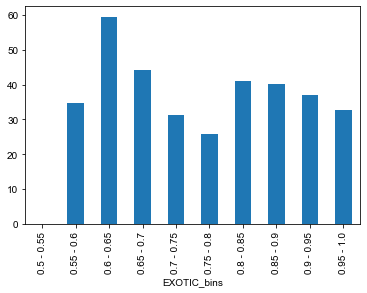

In [14]:
t['Diff%'].plot.bar()

## DROPNA

In [45]:
test = test.dropna()

# Compute distance between exon & sQTL 

In [57]:
def compute_distance(r):
#     print(r)
    sqtl_pos = int(r['sQTL_POS'])
    exon_start = int(r['Exon_start_38'])
    exon_end = int(r['Exon_end_38'])
    if sqtl_pos >= exon_start and sqtl_pos <= exon_end:
        return 0
    else:
        distance_start = np.abs(exon_start - sqtl_pos)
        distance_end = np.abs(exon_end - sqtl_pos)
        return min([distance_start, distance_end])
#     break
test['Distance'] = test.progress_apply(compute_distance, axis=1)
test

100%|██████████| 9090636/9090636 [02:46<00:00, 54438.21it/s]


,snpId,Exon_start,Exon_end,Exon_start_38,Exon_end_38,MAP,EXOTIC_max,Tissue,EXOTIC_tissues_corrected_max,EXOTIC_bins,sQTL_CHROM,sQTL_POS,Distance
0,12_8848014_A_G_b38,8975248,8975309,8822652,8822713,A2ML1_8975248-8975309,0.731334,Testis,Adipose - Subcutaneous,0.7 - 0.75,12,8848014,25301
1,12_8850431_T_A_b38,8975248,8975309,8822652,8822713,A2ML1_8975248-8975309,0.731334,Testis,Adipose - Subcutaneous,0.7 - 0.75,12,8850431,27718
2,12_8845245_G_T_b38,8975248,8975309,8822652,8822713,A2ML1_8975248-8975309,0.731334,Testis,Adipose - Subcutaneous,0.7 - 0.75,12,8845245,22532
3,12_8862121_T_C_b38,8975248,8975309,8822652,8822713,A2ML1_8975248-8975309,0.731334,Testis,Adipose - Subcutaneous,0.7 - 0.75,12,8862121,39408
4,12_8849393_C_G_b38,8975248,8975309,8822652,8822713,A2ML1_8975248-8975309,0.731334,Testis,Adipose - Subcutaneous,0.7 - 0.75,12,8849393,26680
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9090631,3_126457269_G_A_b38,126180378,126181063,126461535,126462220,ZXDC_126180378-126181063,0.910061,Adrenal Gland,Artery - Tibial,0.9 - 0.95,3,126457269,4266
9090632,3_126441686_A_G_b38,126180378,126181063,126461535,126462220,ZXDC_126180378-126181063,0.910061,Adrenal Gland,Artery - Tibial,0.9 - 0.95,3,126441686,19849
9090633,3_126461278_C_T_b38,126180378,126181063,126461535,126462220,ZXDC_126180378-126181063,0.910061,Adrenal Gland,Artery - Tibial,0.9 - 0.95,3,126461278,257
9090634,3_126464077_C_T_b38,126180378,126181063,126461535,126462220,ZXDC_126180378-126181063,0.910061,Adrenal Gland,Artery - Tibial,0.9 - 0.95,3,126464077,1857


In [53]:
def compute_distance(r):
#     print(r)
    sqtl_pos = int(r['sQTL_POS'])
    exon_start = int(r['Exon_start_38'])
    exon_end = int(r['Exon_end_38'])
    if sqtl_pos >= exon_start and sqtl_pos <= exon_end:
        return 0
    else:
        distance_start = np.abs(exon_start - sqtl_pos)
        distance_end = np.abs(exon_end - sqtl_pos)
        return min([distance_start, distance_end])
#     break
test_tissues['Distance'] = test_tissues.progress_apply(compute_distance, axis=1)
test_tissues

100%|██████████| 166978/166978 [00:04<00:00, 36625.81it/s]


,snpId,Exon_start,Exon_end,Exon_start_38,Exon_end_38,MAP,EXOTIC_max,Tissue,EXOTIC_tissues_corrected_max,EXOTIC_bins,sQTL_CHROM,sQTL_POS,Distance
0,12_125121411_C_T_b38,125609448,125609570,125124902,125125024,AACS_125609448-125609570,0.915003,Muscle - Skeletal,Muscle - Skeletal,0.7 - 0.75,12,125121411,3491
1,12_125114058_G_C_b38,125609448,125609570,125124902,125125024,AACS_125609448-125609570,0.915003,Muscle - Skeletal,Muscle - Skeletal,0.7 - 0.75,12,125114058,10844
2,12_125121634_C_T_b38,125609448,125609570,125124902,125125024,AACS_125609448-125609570,0.915003,Muscle - Skeletal,Muscle - Skeletal,0.7 - 0.75,12,125121634,3268
3,12_125123946_T_C_b38,125609448,125609570,125124902,125125024,AACS_125609448-125609570,0.915003,Muscle - Skeletal,Muscle - Skeletal,0.7 - 0.75,12,125123946,956
4,12_125110512_G_C_b38,125609448,125609570,125124902,125125024,AACS_125609448-125609570,0.915003,Muscle - Skeletal,Muscle - Skeletal,0.7 - 0.75,12,125110512,14390
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166973,19_56231728_A_G_b38,56736032,56736415,56224663,56225046,ZSCAN5A_56736032-56736415,0.964345,Testis,Testis,0.95 - 1.0,19,56231728,6682
166974,3_126441758_C_T_b38,126157218,126157304,126438375,126438461,ZXDC_126157218-126157304,0.912582,Muscle - Skeletal,Muscle - Skeletal,0.95 - 1.0,3,126441758,3297
166975,3_126441758_C_T_b38,126158475,126158570,126439632,126439727,ZXDC_126158475-126158570,0.912582,Muscle - Skeletal,Muscle - Skeletal,0.95 - 1.0,3,126441758,2031
166976,3_126441758_C_T_b38,126160608,126160789,126441765,126441946,ZXDC_126160608-126160789,0.912582,Muscle - Skeletal,Muscle - Skeletal,0.95 - 1.0,3,126441758,7


In [21]:
tmp_gb = test[['EXOTIC_bins', 'Distance', 'Tissue']].groupby(['EXOTIC_bins', 'Tissue']).describe().reset_index()
tmp_gb

EXOTIC_bins                            Tissue Distance                 \
                                                     count           mean   
0    0.5 - 0.55            Adipose - Subcutaneous     69.0   17133.855072   
1    0.5 - 0.55      Adipose - Visceral (Omentum)     54.0   17204.425926   
2    0.5 - 0.55                     Adrenal Gland     52.0   18256.673077   
3    0.5 - 0.55                    Artery - Aorta     52.0   19885.692308   
4    0.5 - 0.55                 Artery - Coronary     51.0   18522.901961   
..          ...                               ...      ...            ...   
352  0.95 - 1.0  Small Intestine - Terminal Ileum    116.0    5625.077586   
353  0.95 - 1.0                            Spleen     31.0   16334.096774   
354  0.95 - 1.0                           Stomach     59.0    7297.694915   
355  0.95 - 1.0                            Testis  20294.0  124747.658175   
356  0.95 - 1.0                       Whole Blood   3941.0   29154.799036   

                                                                  
               std    min      25%      50%       75%        max  
0     13230.018843    4.0   5352.0  13208.0  29284.00    40047.0  
1     13089.051139    4.0   5368.5  12811.5  29257.25    40047.0  
2     13445.821794    4.0   5337.0  17598.0  30303.00    40047.0  
3     14771.623227    4.0   5337.0  20608.0  33927.75    43811.0  
4     13672.106485    4.0   5322.0  18484.0  33056.00    40047.0  
..             ...    ...      ...      ...       ...        ...  
352    4258.081215    2.0   1936.5   5259.0   8144.25    16696.0  
353   14991.029147  844.0   4061.0   9464.0  30938.00    44317.0  
354    5610.088328   13.0   1929.5   6859.0  11478.00    18622.0  
355  227881.560288    1.0  12901.0  32352.5  76882.75  1174748.0  
356   27973.723998    5.0   7147.0  19748.0  42226.00   151539.0  

[357 rows x 10 columns]

In [22]:
tmp_gb.loc[tmp_gb['Tissue'] == 'Muscle - Skeletal']

EXOTIC_bins             Tissue Distance                              \
                                      count          mean           std   
30   0.5 - 0.55  Muscle - Skeletal    227.0  86307.110132  59177.217744   
76   0.55 - 0.6  Muscle - Skeletal    272.0  42479.272059  38738.007638   
114  0.6 - 0.65  Muscle - Skeletal     15.0  25458.800000  27799.939952   
144  0.65 - 0.7  Muscle - Skeletal     32.0  12285.531250  11658.243405   
175  0.7 - 0.75  Muscle - Skeletal    292.0  23445.188356  12672.432569   
207  0.75 - 0.8  Muscle - Skeletal    388.0  13932.574742  12703.605686   
244  0.8 - 0.85  Muscle - Skeletal   1802.0  52767.004440  85798.503615   
284  0.85 - 0.9  Muscle - Skeletal   5554.0  52551.661325  63448.696898   
318  0.9 - 0.95  Muscle - Skeletal  16627.0  30531.593252  28444.060814   
347  0.95 - 1.0  Muscle - Skeletal  16111.0  36961.431258  38154.056110   

                                                    
       min       25%      50%        75%       max  
30   667.0  35401.50  77438.0  136672.50  197236.0  
76    59.0  12619.50  29261.5   61885.00  133062.0  
114  702.0   3354.50   5546.0   53090.00   66300.0  
144   44.0   1933.00   9532.0   20014.75   34514.0  
175   25.0  14799.75  20215.0   30539.00   73768.0  
207    3.0   3846.50   9751.5   20593.50   58065.0  
244    8.0   6537.25  18182.0   53555.75  472804.0  
284    0.0   6085.25  20692.0   84955.75  223994.0  
318    3.0   9106.00  23352.0   45577.00  400668.0  
347    2.0   8374.50  23789.0   54666.50  217954.0

In [65]:
test[['EXOTIC_bins', 'Distance']].groupby('EXOTIC_bins').describe()

Distance                                                       \
               count          mean            std   min      25%      50%   
EXOTIC_bins                                                                 
0.5 - 0.55    4493.0  32604.698197   39638.833260   4.0   6920.0  21100.0   
0.55 - 0.6    2093.0  28923.964644   46249.713381   7.0   5724.0  14828.0   
0.6 - 0.65    2594.0  32922.876253   28304.769821   5.0  10144.5  27864.5   
0.65 - 0.7    1363.0  33821.928833   42841.133834  24.0   6749.5  18176.0   
0.7 - 0.75    2273.0  13016.294325   13850.538324  20.0   3744.0   8409.0   
0.75 - 0.8    2707.0  18118.852974   23698.837685   2.0   4912.0  11253.0   
0.8 - 0.85   12391.0  44813.576386   87363.870196   0.0   7547.5  23008.0   
0.85 - 0.9   31325.0  59615.956073  301099.978546   0.0   8212.0  23517.0   
0.9 - 0.95   50013.0  61559.323396  102535.059659   0.0   9081.0  25271.0   
0.95 - 1.0   57726.0  67016.621938  145125.807928   1.0   9878.5  25139.0   

                                  
                 75%         max  
EXOTIC_bins                       
0.5 - 0.55   37260.0    197236.0  
0.55 - 0.6   26581.0    258976.0  
0.6 - 0.65   47831.5    292120.0  
0.65 - 0.7   44946.0    185852.0  
0.7 - 0.75   17869.0     96326.0  
0.75 - 0.8   22933.0    186209.0  
0.8 - 0.85   46902.5    717250.0  
0.85 - 0.9   78003.0  36605808.0  
0.9 - 0.95   60941.0   1000609.0  
0.95 - 1.0   56748.5   1174748.0

In [45]:
tmp_gb_all = test[['EXOTIC_bins', 'Distance', 'snpId']].drop_duplicates(subset=['snpId'])
tmp_gb_all = tmp_gb_all.loc[tmp_gb_all['Distance'] < (tmp_gb_all['Distance'].quantile(0.95))]
tmp_gb_all[['EXOTIC_bins', 'Distance', 'snpId']].groupby('EXOTIC_bins').describe()

Distance                                                      \
               count          mean           std  min       25%      50%   
EXOTIC_bins                                                                
0.5 - 0.55     382.0  52010.133508  47698.749088  4.0  12579.25  38143.5   
0.55 - 0.6    1266.0  24862.367299  29239.038702  7.0   5664.25  14333.0   
0.6 - 0.65    1483.0  32634.376264  33240.537213  5.0   8269.50  20502.0   
0.65 - 0.7    2500.0  39134.358800  45367.670217  3.0   6160.75  18858.5   
0.7 - 0.75    4855.0  36927.973223  39080.018690  4.0   7540.50  21796.0   
0.75 - 0.8    7708.0  37076.350934  41123.441100  0.0   6820.50  19692.5   
0.8 - 0.85   19787.0  34560.469702  37897.049466  0.0   6873.00  20349.0   
0.85 - 0.9   41501.0  30708.321534  36170.975786  0.0   6698.00  17085.0   
0.9 - 0.95   44767.0  31129.065986  36088.932873  0.0   6436.50  16948.0   
0.95 - 1.0   37843.0  37564.045821  40230.786329  0.0   8276.50  22826.0   

                                 
                  75%       max  
EXOTIC_bins                      
0.5 - 0.55   76169.00  184572.0  
0.55 - 0.6   29453.00  170626.0  
0.6 - 0.65   46912.00  172614.0  
0.65 - 0.7   56742.75  184703.0  
0.7 - 0.75   54570.00  184883.0  
0.75 - 0.8   53987.75  184924.0  
0.8 - 0.85   48850.00  185047.0  
0.85 - 0.9   39079.00  185068.0  
0.9 - 0.95   42211.00  184967.0  
0.95 - 1.0   52148.00  185083.0

In [54]:
tmp_gb_tissues = test_tissues[['EXOTIC_bins', 'Distance', 'snpId']].drop_duplicates(subset=['snpId'])
tmp_gb_tissues.

,EXOTIC_bins,Distance,snpId
0,0.7 - 0.75,3491,12_125121411_C_T_b38
1,0.7 - 0.75,10844,12_125114058_G_C_b38
2,0.7 - 0.75,3268,12_125121634_C_T_b38
3,0.7 - 0.75,956,12_125123946_T_C_b38
4,0.7 - 0.75,14390,12_125110512_G_C_b38
...,...,...,...
166920,0.95 - 1.0,17487,19_56239810_C_CCTTTA_b38
166921,0.95 - 1.0,20100,19_56242423_C_T_b38
166922,0.95 - 1.0,12425,19_56234748_G_A_b38
166923,0.95 - 1.0,9405,19_56231728_A_G_b38


In [46]:
tmp_gb_tissues = test_tissues[['EXOTIC_bins', 'Distance', 'snpId']].drop_duplicates(subset=['snpId'])
tmp_gb_tissues = tmp_gb_tissues.loc[tmp_gb_tissues['Distance'] < (test_tissues['Distance'].quantile(0.95))]
tmp_gb_tissues[['EXOTIC_bins', 'Distance', 'snpId']].groupby('EXOTIC_bins').describe()

Distance                                                         \
               count           mean           std   min       25%       50%   
EXOTIC_bins                                                                   
0.5 - 0.55       0.0            NaN           NaN   NaN       NaN       NaN   
0.55 - 0.6       0.0            NaN           NaN   NaN       NaN       NaN   
0.6 - 0.65       0.0            NaN           NaN   NaN       NaN       NaN   
0.65 - 0.7    2954.0   46266.064997  50653.520533   3.0   7986.25   26467.5   
0.7 - 0.75    5070.0   36083.207692  38785.999932   0.0   8112.00   22679.0   
0.75 - 0.8     337.0  130854.062315  65686.889029  59.0  77032.00  147511.0   
0.8 - 0.85    9085.0   31569.496973  37606.454070   0.0   6572.00   17329.0   
0.85 - 0.9   10837.0   38091.658762  42156.193585   2.0   7379.00   22170.0   
0.9 - 0.95    8618.0   33134.305407  40265.919923   2.0   6791.25   17932.0   
0.95 - 1.0    7246.0   26262.044576  31064.296471   0.0   6210.50   15573.5   

                                  
                   75%       max  
EXOTIC_bins                       
0.5 - 0.55         NaN       NaN  
0.55 - 0.6         NaN       NaN  
0.6 - 0.65         NaN       NaN  
0.65 - 0.7    67693.00  216188.0  
0.7 - 0.75    49805.75  220060.0  
0.75 - 0.8   183578.00  220303.0  
0.8 - 0.85    41874.00  219512.0  
0.85 - 0.9    54632.00  219775.0  
0.9 - 0.95    42023.25  220045.0  
0.95 - 1.0    33908.50  220831.0

In [60]:
tmp_gb_tissues[['EXOTIC_bins', 'Distance']].describe()

,Distance
count,4.530800e+04
mean,4.859553e+04
std,2.000478e+05
min,0.000000e+00
25%,7.216000e+03
50%,2.017950e+04
75%,5.057525e+04
max,3.660581e+07


In [44]:
test_tissues['Distance'].quantile(0.95)

220864.15

In [52]:
tmp_gb_all.loc[(tmp_gb_all['EXOTIC_bins'] == '0.95 - 1.0') & (tmp_gb_all['Distance'] < 1000)]

,EXOTIC_bins,Distance,snpId
24396,0.95 - 1.0,448,6_43428587_C_T_b38
24404,0.95 - 1.0,979,6_43429118_A_C_b38
24996,0.95 - 1.0,303,17_50667251_G_T_b38
57976,0.95 - 1.0,45,17_49216486_C_T_b38
57978,0.95 - 1.0,938,17_49215593_G_C_b38
...,...,...,...
9087201,0.95 - 1.0,914,19_23372828_G_C_b38
9087313,0.95 - 1.0,680,19_23374517_G_C_b38
9087430,0.95 - 1.0,34,19_23373803_A_G_b38
9089447,0.95 - 1.0,786,19_56223109_G_C_b38


In [58]:
tmp_gb_all.loc[(tmp_gb_all['Distance'] == 0)]

,EXOTIC_bins,Distance,snpId
720770,0.8 - 0.85,0,17_7015774_T_C_b38
2013885,0.95 - 1.0,0,14_23360833_T_C_b38
2109586,0.75 - 0.8,0,22_29225139_C_G_b38
2674995,0.9 - 0.95,0,19_49474672_A_G_b38
4296013,0.8 - 0.85,0,15_52343197_T_A_b38
5777337,0.85 - 0.9,0,6_30345491_G_A_b38
7069646,0.85 - 0.9,0,6_158713878_AG_A_b38
8892774,0.9 - 0.95,0,19_57633347_A_G_b38


In [56]:
tmp_gb_tissues.loc[(tmp_gb_tissues['Distance'] == 0)]

,EXOTIC_bins,Distance,snpId
1618,0.7 - 0.75,0,16_89101050_C_A_b38
1733,0.7 - 0.75,0,16_89100987_C_T_b38
1734,0.7 - 0.75,0,16_89100686_T_C_b38
1741,0.7 - 0.75,0,16_89100996_T_C_b38
1747,0.7 - 0.75,0,16_89101023_G_C_b38
...,...,...,...
161602,0.95 - 1.0,0,10_97744873_G_T_b38
162211,0.95 - 1.0,0,19_44479350_G_C_b38
162648,0.95 - 1.0,0,19_57633347_A_G_b38
162751,0.95 - 1.0,0,12_133193510_G_A_b38


In [37]:
test[['EXOTIC_bins', 'Distance']].groupby('EXOTIC_bins').count()

,Distance
EXOTIC_bins,
0.5 - 0.55,4492
0.55 - 0.6,1369
0.6 - 0.65,1050
0.65 - 0.7,759
0.7 - 0.75,1594
0.75 - 0.8,2185
0.8 - 0.85,7317
0.85 - 0.9,18847
0.9 - 0.95,31515


(0.0, 600000.0)

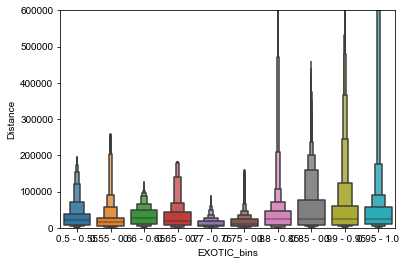

In [68]:
sns.boxenplot(data=test, x='EXOTIC_bins', y='Distance', showfliers=False)
plt.ylim(0,0.6e6)

(0.0, 5000000.0)

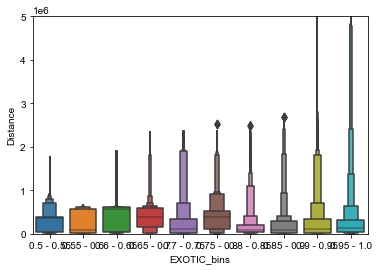

In [49]:
sns.boxenplot(data=test, x='EXOTIC_bins', y='Distance')
plt.ylim(0,0.5e7)

In [61]:
biomart_transcripts = pd.read_csv('/gstock/EXOTIC/data/OTHERS/biomart_all.txt.gz', compression='gzip', sep='\t')
biomart_transcripts

,Gene stable ID,Transcript stable ID,Exon stable ID,Gene start (bp),Gene end (bp),Transcript start (bp),Transcript end (bp),Transcription start site (TSS),Transcript length (including UTRs and CDS),Gene name,...,Transcript count,Transcript type,Gene type,Gene % GC content,APPRIS annotation,Transcript support level (TSL),Protein stable ID,HGNC ID,UniProtKB/Swiss-Prot ID,RefSeq mRNA ID
0,ENSG00000198888,ENST00000361390,ENSE00001435714,3307,4262,3307,4262,3307,956,MT-ND1,...,1,protein_coding,protein_coding,47.70,principal1,tslNA,ENSP00000354687,HGNC:7455,P03886,NaN
1,ENSG00000198763,ENST00000361453,ENSE00001435686,4470,5511,4470,5511,4470,1042,MT-ND2,...,1,protein_coding,protein_coding,42.99,principal1,tslNA,ENSP00000355046,HGNC:7456,P03891,NaN
2,ENSG00000198804,ENST00000361624,ENSE00001435647,5904,7445,5904,7445,5904,1542,MT-CO1,...,1,protein_coding,protein_coding,46.24,principal1,tslNA,ENSP00000354499,HGNC:7419,P00395,NaN
3,ENSG00000198712,ENST00000361739,ENSE00001435613,7586,8269,7586,8269,7586,684,MT-CO2,...,1,protein_coding,protein_coding,46.20,principal1,tslNA,ENSP00000354876,HGNC:7421,P00403,NaN
4,ENSG00000228253,ENST00000361851,ENSE00001435286,8366,8572,8366,8572,8366,207,MT-ATP8,...,1,protein_coding,protein_coding,39.61,principal1,tslNA,ENSP00000355265,HGNC:7415,P03928,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319367,ENSG00000185220,ENST00000355360,ENSE00003603972,248906196,248919946,248906196,248919946,248906196,2879,PGBD2,...,3,protein_coding,protein_coding,46.25,NaN,tsl1,ENSP00000355424,HGNC:19399,Q6P3X8,NM_001017434
1319368,ENSG00000185220,ENST00000355360,ENSE00001400348,248906196,248919946,248906196,248919946,248906196,2879,PGBD2,...,3,protein_coding,protein_coding,46.25,NaN,tsl1,ENSP00000355424,HGNC:19399,Q6P3X8,NM_001017434
1319369,ENSG00000185220,ENST00000329291,ENSE00001637224,248906196,248919946,248906235,248919146,248906235,2717,PGBD2,...,3,protein_coding,protein_coding,46.25,principal1,tsl1 (assigned to previous version 5),ENSP00000331643,HGNC:19399,Q6P3X8,NM_170725
1319370,ENSG00000185220,ENST00000329291,ENSE00003610993,248906196,248919946,248906235,248919146,248906235,2717,PGBD2,...,3,protein_coding,protein_coding,46.25,principal1,tsl1 (assigned to previous version 5),ENSP00000331643,HGNC:19399,Q6P3X8,NM_170725


In [71]:
merge_exotic_sqtl_on_tissues_max.symbol.nunique()

1189

In [82]:
all_tr_sqtl = [e.split('.')[0] for e in list(set(merge_exotic_sqtl_on_tissues_max['tr.first'].unique().tolist() + merge_exotic_sqtl_on_tissues_max['tr.second'].unique().tolist()))]
print(len(all_tr_sqtl))
print(len(biomart_transcripts.loc[biomart_transcripts['Transcript stable ID'].isin(all_tr_sqtl), 'Transcript stable ID'].unique().tolist()))
print(set(all_tr_sqtl).difference(set(biomart_transcripts.loc[biomart_transcripts['Transcript stable ID'].isin(all_tr_sqtl), 'Transcript stable ID'].unique().tolist())))

3866
2895
{'ENST00000578287', 'ENST00000640075', 'ENST00000465287', 'ENST00000583973', 'ENST00000460445', 'ENST00000575812', 'ENST00000509082', 'ENST00000591377', 'ENST00000318809', 'ENST00000611270', 'ENST00000476434', 'ENST00000504286', 'ENST00000471896', 'ENST00000566105', 'ENST00000368563', 'ENST00000506507', 'ENST00000471142', 'ENST00000468508', 'ENST00000585839', 'ENST00000459995', 'ENST00000482149', 'ENST00000465624', 'ENST00000556255', 'ENST00000576870', 'ENST00000462982', 'ENST00000517546', 'ENST00000481566', 'ENST00000518895', 'ENST00000490479', 'ENST00000521176', 'ENST00000495802', 'ENST00000511570', 'ENST00000482172', 'ENST00000511238', 'ENST00000462457', 'ENST00000513103', 'ENST00000512448', 'ENST00000569426', 'ENST00000469803', 'ENST00000569901', 'ENST00000578148', 'ENST00000568290', 'ENST00000504112', 'ENST00000534008', 'ENST00000585514', 'ENST00000525904', 'ENST00000525265', 'ENST00000575281', 'ENST00000490193', 'ENST00000472157', 'ENST00000595666', 'ENST00000491311', '

In [79]:
biomart_transcripts.loc[(~biomart_transcripts['Transcript stable ID'].isin(all_tr_sqtl)) & (biomart_transcripts.loc[biomart_transcripts['Transcript stable ID'].isin(all_tr_sqtl), 'Transcript stable ID'].unique()), 'Transcript stable ID'].nunique()

ValueError: operands could not be broadcast together with shapes (1319372,) (2895,) 

In [75]:
all_tr_sqtl

['ENST00000331821.7',
 'ENST00000343420.6',
 'ENST00000466451.1',
 'ENST00000482030.5',
 'ENST00000521800.1',
 'ENST00000465137.5',
 'ENST00000591463.1',
 'ENST00000638814.1',
 'ENST00000360568.7',
 'ENST00000484310.5',
 'ENST00000592515.1',
 'ENST00000217800.9',
 'ENST00000397174.6',
 'ENST00000561074.5',
 'ENST00000495107.1',
 'ENST00000007969.12',
 'ENST00000580977.1',
 'ENST00000471268.1',
 'ENST00000264052.9',
 'ENST00000505458.5',
 'ENST00000492966.5',
 'ENST00000619054.4',
 'ENST00000640709.1',
 'ENST00000520427.1',
 'ENST00000493944.5',
 'ENST00000520342.5',
 'ENST00000571530.5',
 'ENST00000548878.6',
 'ENST00000568798.5',
 'ENST00000397443.6',
 'ENST00000475414.1',
 'ENST00000533048.5',
 'ENST00000601032.5',
 'ENST00000425728.6',
 'ENST00000552878.5',
 'ENST00000486249.5',
 'ENST00000502495.1',
 'ENST00000521672.5',
 'ENST00000336934.9',
 'ENST00000563048.5',
 'ENST00000310924.6',
 'ENST00000369669.5',
 'ENST00000455445.6',
 'ENST00000314754.12',
 'ENST00000430260.6',
 'ENST00